In [ ]:
# Import required packages
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt

# data preparation
# Getting the data ready
# Generate train dummy data for 1000 Students and dummy test for 500
# Columns :Age, Hours of Study & Avg Previous test scores
np.random.seed(2018)
train_data, test_data = np.random.random((1000, 5)), np.random.random((300, 5))
#Generate dummy results for 1000 students : Whether Passed (1) or Failed (0)
labels = np.random.randint(2, size=(1000, 1))

print(train_data.shape,'\n', test_data.shape,'\n', labels.shape)
print(train_data[:3],'\n', test_data[:3],'\n', labels[:3])

'''
The following is a basic MLP architecture
'''
#Defining the model structure with the required layers, # of neurons, activation function and optimizers
model = Sequential()
model.add(Dense(5, input_dim=5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


'''
The following is a basic DNN architecture

#Defining the model structure with the required layers, # of neurons, activation function and optimizers
model = Sequential()
model.add(Dense(5, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''


#Train the model and make predictions
history = model.fit(train_data, labels, validation_split=0.33, epochs=1500, batch_size=32, verbose=0)

scores = model.evaluate(train_data, labels)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#Make predictions from the trained model
predictions = model.predict(test_data)

(1000, 5) 
 (300, 5) 
 (1000, 1)
[[0.88234931 0.10432774 0.90700933 0.3063989  0.44640887]
 [0.58998539 0.8371111  0.69780061 0.80280284 0.10721508]
 [0.75709253 0.99967101 0.725931   0.14144824 0.3567206 ]] 
 [[0.490842   0.82002257 0.02412975 0.95877417 0.95778299]
 [0.67500227 0.99163823 0.76246149 0.23794948 0.7134008 ]
 [0.16978325 0.78379898 0.22230407 0.69435662 0.50436167]] 
 [[0]
 [1]
 [0]]
32/32 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5180
loss: 24.98%
accuracy: 51.80%


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


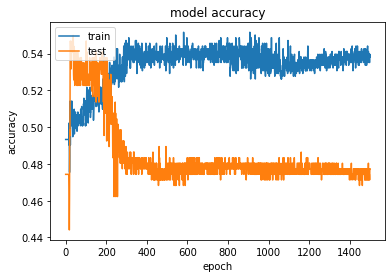

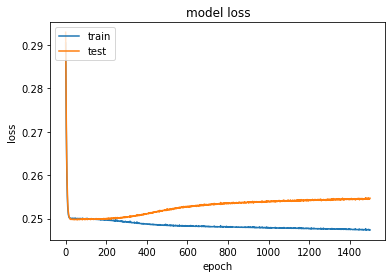

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()